## Extracting Stock Data

In [7]:
!pip install yfinance
!pip install matplotlib
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 52.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 126.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 102.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 120.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 29.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=cd61073b19735749f5acf70f24a871e2

In [9]:
import yfinance as yf
import pandas as pd

## Extracting Stock  Apple

In [12]:
apple = yf.Ticker("AAPL")
print(apple.dividends)
print('---------------------------------------')
print(apple.splits)

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64
---------------------------------------
Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


In [13]:
apple.info['country']

'United States'

### Extracting Share Price

In [14]:
apple_share_price_data = apple.history(period="max")

In [15]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [16]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

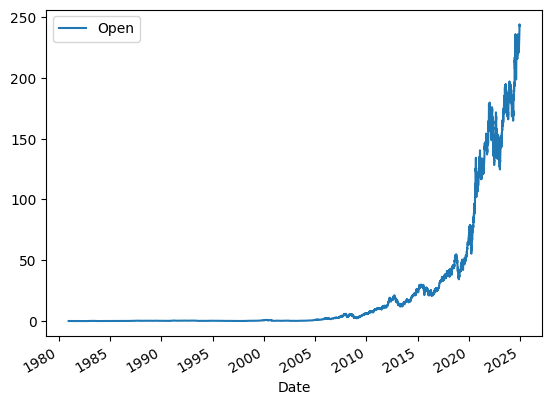

In [17]:
apple_share_price_data.plot(x="Date", y="Open")

#### Extracting Dividends
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

<Axes: xlabel='Date'>

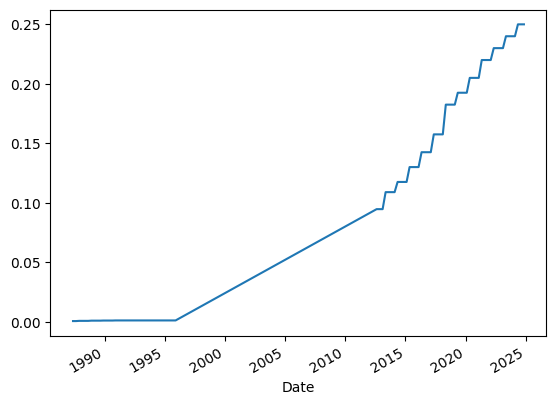

In [18]:
apple.dividends.plot()

###  Define Graphing Function

In [20]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Use yfinance to Extract Stock  Tesla Data

In [21]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract stock information using the history function with period set to "max"
tesla_data = tesla.history(period="max")

# Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [25]:
# Remove commas and dollar signs from the 'Revenue' column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Drop any rows with missing values
tesla_revenue.dropna(inplace=True)

# Remove any rows where the 'Revenue' column is empty
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Plot Tesla Stock Graph

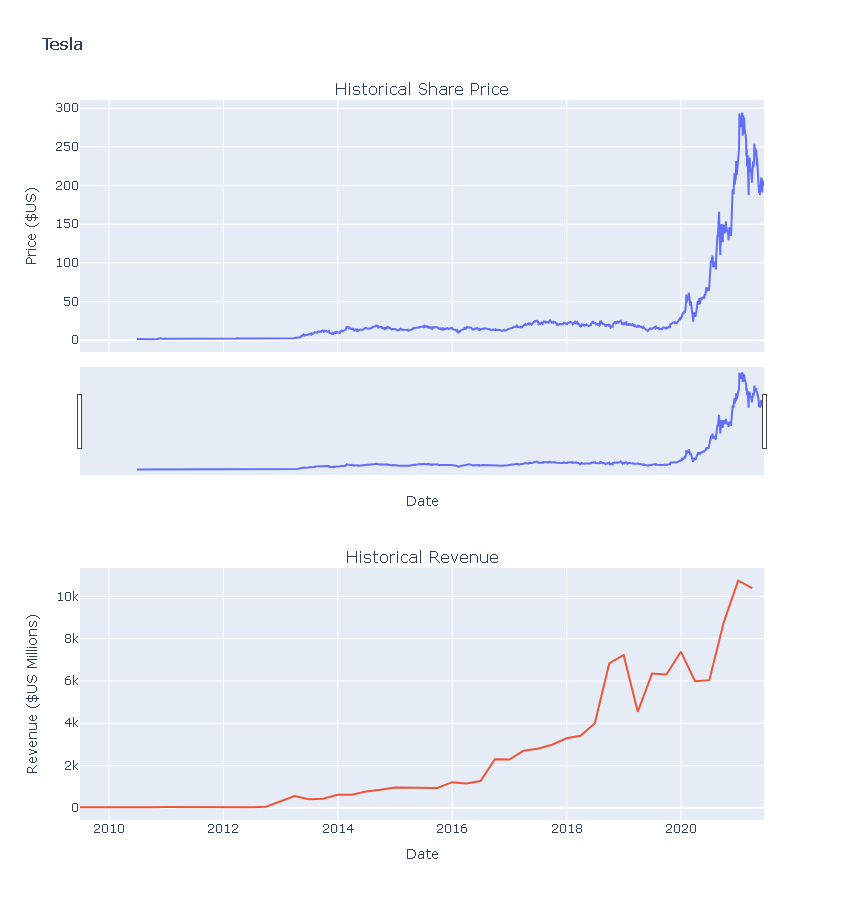

In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    # Create subplots with shared x-axes
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    # Filter data up to June 2021 for stock data and April 2021 for revenue data
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add share price trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    # Add revenue trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Update axes titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Display the figure
    fig.show()

# Assuming tesla_data and tesla_revenue are already defined, call the function
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Plot GameStop Stock Graph

[*********************100%***********************]  1 of 1 completed


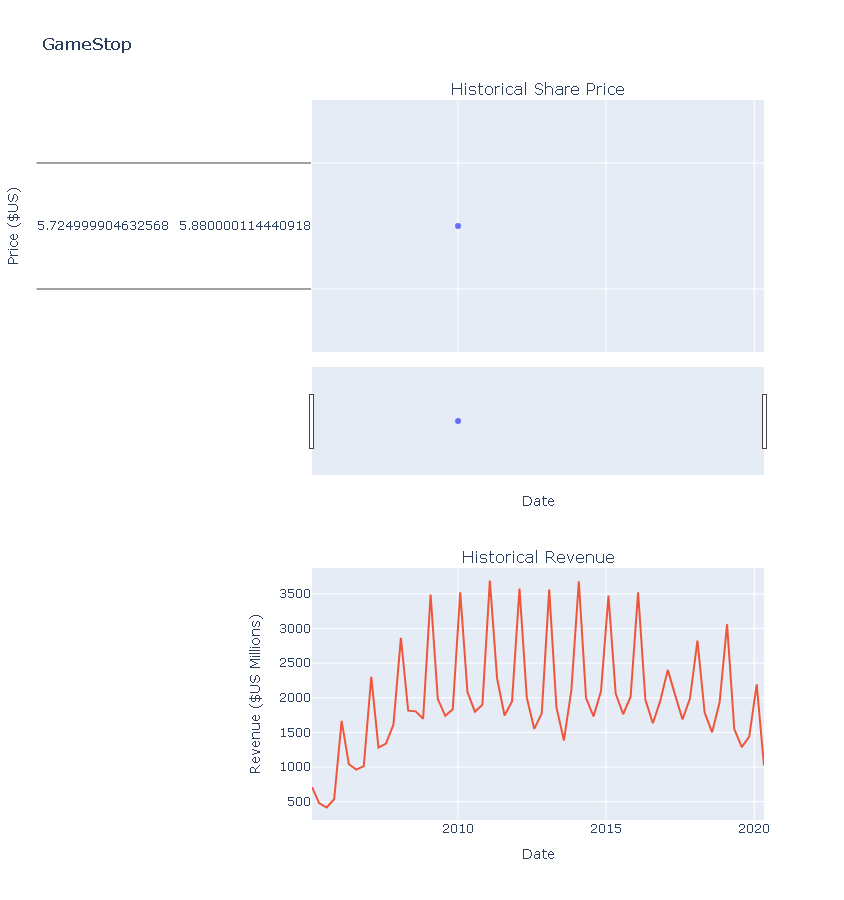

In [29]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import requests
from bs4 import BeautifulSoup

# Download GameStop stock data from Yahoo Finance
gme_data = yf.download('GME', start='2010-01-01', end='2021-06-14')

# Scrape GameStop revenue data from HTML page
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_2).text
soup_2 = BeautifulSoup(html_data_2, "html.parser")
table_2 = soup_2.find_all("tbody")[1]  # GameStop revenue data is in the second <tbody>

# Extract data
data = []
for row in table_2.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) > 0:  # Only process rows with data
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create DataFrame and clean data
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    # Filter data up to June 2021 for stock data and April 2021 for revenue data
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add share price trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.index), y=stock_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)
    
    # Add revenue trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Update axes titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Display the figure
    fig.show()

# Call the function to plot the GameStop stock and revenue graph
make_graph(gme_data, gme_revenue, 'GameStop')


### Extract Stock  Amazon Data

In [30]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for amazon (AMZN)
amazon = yf.Ticker("AMZN")

# Extract stock information using the history function with period set to "max"
amazon_data = amazon.history(period="max")

# Reset the index of the dataframe
amazon_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(amazon_data.head())

                       Date      Open      High       Low     Close  \
0 1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1 1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2 1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3 1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4 1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  


In [33]:
# فرض کنید داده‌ها در یک فایل CSV به نام 'amazon_revenue.csv' ذخیره شده‌اند
amazon_revenue = pd.read_csv('amazon_revenue.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'amazon_revenue.csv'

In [32]:
# Remove commas and dollar signs from the 'Revenue' column
amazon_revenue["Revenue"] = amazon_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Drop any rows with missing values
amazon_revenue.dropna(inplace=True)

# Remove any rows where the 'Revenue' column is empty
amazon_revenue = amazon_revenue[amazon_revenue['Revenue'] != ""]

# Display the last 5 rows of the DataFrame
print(amazon_revenue.tail())


NameError: name 'amazon_revenue' is not defined